In [1]:
import pandas as pd 
from utils import (
    load_survey_responses,
    process_survey_responses,
    process_final_responses,
    aggregate_user_responses
)
import config


In [2]:
print("Loading survey responses...")
survey_df = load_survey_responses("../survey_results/survey_response/", config.SURVEY_RESPONSES_PATTERN)

Loading survey responses...


In [3]:
survey_df.columns

Index(['user_id', 'age', 'gender', 'marital_status', 'has_children',
       'nationality', 'city', 'disability', 'pets', 'profession', 'hobbies',
       'interests', 'travel_experience', 'preferred_travel_style', 'poi_id',
       'poi_title', 'is_manual_first', 'manual_significance', 'manual_trust',
       'manual_clarity', 'ai_significance', 'ai_trust', 'ai_clarity',
       'engaging_preference', 'relevant_preference', 'eager_preference',
       'title_preference', 'description_preference', 'already_visited',
       'timestamp'],
      dtype='object')

In [4]:
survey_df

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
0,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have never heard of it before.,2024-12-16T12:55:40.540271
1,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have never heard of it before.,2024-12-16T12:57:24.904851
2,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Neutral,Moderately,Neutral,Version A,Version A,Version A,Version A,Version A,I have never heard of it before.,2024-12-16T12:58:44.648347
3,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Agree,Moderately,Clear,Version A,Version A,Version B,Version A,Version A,I have never heard of it before.,2024-12-16T13:01:23.608229
4,e6dd2d90-fc52-4004-b29e-b36e267e541c,31,Female,Married,Yes,Indian,Stuttgart,No,No,NaN,...,Neutral,Moderately,Neutral,Version A,Version A,Version A,Both equally,Both equally,I have never heard of it before.,2024-12-16T13:03:18.750496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,64326ad9-8f1f-4ce5-a897-c811f3d86113,31,Female,Married,No,German,Stuttgart,No,No,Academic/Professor,...,Strongly Agree,Extremely,Very Clear,Version A,Version B,Version A,Version A,Version B,I have visited it in person.,2025-01-29T17:13:22.101838
316,64326ad9-8f1f-4ce5-a897-c811f3d86113,31,Female,Married,No,German,Stuttgart,No,No,Academic/Professor,...,Strongly Agree,Moderately,Clear,Version B,Version A,Version B,Both equally,Version A,I have visited it in person.,2025-01-29T17:15:04.707498
317,64326ad9-8f1f-4ce5-a897-c811f3d86113,31,Female,Married,No,German,Stuttgart,No,No,Academic/Professor,...,Agree,Very,Clear,Version B,Version A,Both equally,Version A,Version A,I have visited it in person.,2025-01-29T17:17:37.326193
318,64326ad9-8f1f-4ce5-a897-c811f3d86113,31,Female,Married,No,German,Stuttgart,No,No,Academic/Professor,...,Strongly Agree,Extremely,Very Clear,Version A,Version B,Both equally,Both equally,Version B,I have visited it in person.,2025-01-29T17:19:48.295584


In [35]:

survey_df ['timestamp']= pd.to_datetime(survey_df['timestamp'])
filter_date = pd.to_datetime('2025-01-28')
survey_df = survey_df[survey_df['timestamp'] >= filter_date]
survey_df

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
180,f561e8a0-3835-42d9-8c1e-12b72373979c,33,Female,Married,Yes,Indian,Mumbai,No,No,Engineer,...,Agree,Moderately,Neutral,Version B,Version B,Version B,Version A,Version B,I have seen/heard about it online or from others.,2025-01-28 13:09:47.793579
181,f561e8a0-3835-42d9-8c1e-12b72373979c,33,Female,Married,Yes,Indian,Mumbai,No,No,Engineer,...,Agree,Very,Very Clear,Version B,Version B,Version A,Version B,Version A,I have never heard of it before.,2025-01-28 13:10:21.301898
182,f561e8a0-3835-42d9-8c1e-12b72373979c,33,Female,Married,Yes,Indian,Mumbai,No,No,Engineer,...,Agree,Very,Clear,Version B,Version A,Version A,Version B,Version A,I have seen/heard about it online or from others.,2025-01-28 13:10:47.115692
183,f561e8a0-3835-42d9-8c1e-12b72373979c,33,Female,Married,Yes,Indian,Mumbai,No,No,Engineer,...,Neutral,Extremely,Clear,Version A,Version A,Version B,Version A,Version A,I have seen/heard about it online or from others.,2025-01-28 13:11:15.936463
184,f561e8a0-3835-42d9-8c1e-12b72373979c,33,Female,Married,Yes,Indian,Mumbai,No,No,Engineer,...,Neutral,Very,Very Clear,Version A,Version B,Version A,Version B,Version A,I have seen/heard about it online or from others.,2025-01-28 13:11:39.111526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,87ef958d-a3d0-44c2-9e75-68e512b9ad50,27,Female,Single,No,German,Stuttgart,No,No,Student,...,Agree,Slightly,Neutral,Version A,Both equally,Version A,Version A,Version A,I have visited it in person.,2025-01-29 14:48:06.158513
296,87ef958d-a3d0-44c2-9e75-68e512b9ad50,27,Female,Single,No,German,Stuttgart,No,No,Student,...,Neutral,Very,Neutral,Version A,Version A,Version A,Version B,Both equally,I have seen/heard about it online or from others.,2025-01-29 14:50:16.877277
297,87ef958d-a3d0-44c2-9e75-68e512b9ad50,27,Female,Single,No,German,Stuttgart,No,No,Student,...,Agree,Very,Neutral,Version A,Both equally,Version A,Version A,Version A,I have seen/heard about it online or from others.,2025-01-29 14:52:54.699391
298,87ef958d-a3d0-44c2-9e75-68e512b9ad50,27,Female,Single,No,German,Stuttgart,No,No,Student,...,Neutral,Slightly,Unclear,Version A,Version A,Version A,Version A,Version A,I have never heard of it before.,2025-01-29 14:54:24.482213


In [5]:
import matplotlib.pyplot as plt

def plot_graph(df,cat_type, column_name1, column_name2, title):
   

    # Convert columns to categorical type
    df[column_name1] = df[column_name1].astype(cat_type)
    df[column_name2] = df[column_name2].astype(cat_type)

    # Calculate value counts with the ordered categories
    manual_counts = df[column_name1].value_counts().sort_index()
    ai_counts = df[column_name2].value_counts().sort_index()
    print(f"Manual counts: {manual_counts}, AI counts: {ai_counts}")
    # Set up the plot
    plt.figure(figsize=(12, 6))

    # Set the positions of the bars
    x = range(len(cat_type.categories))
    width = 0.35

    # Create bars
    plt.bar([i - width/2 for i in x], manual_counts, width, 
            label=column_name1, color='#2ecc71')
    plt.bar([i + width/2 for i in x], ai_counts, width, 
            label=column_name2, color='#3498db')

    # Customize the plot
    plt.xlabel('Rating Scale')
    plt.ylabel('Number of Responses')
    plt.title(title)
    plt.xticks(x, cat_type.categories)
    plt.legend()

    # Add value labels on top of bars
    for i, v in enumerate(manual_counts):
        plt.text(i - width/2, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(ai_counts):
        plt.text(i + width/2, v, str(v), ha='center', va='bottom')

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Show the plot
    plt.show()


C:\Users\saini\AppData\Local\Temp\ipykernel_25872\2344981966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name1] = df[column_name1].astype(cat_type)
C:\Users\saini\AppData\Local\Temp\ipykernel_25872\2344981966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name2] = df[column_name2].astype(cat_type)


Manual counts: manual_significance
Strongly Disagree     1
Disagree              2
Neutral              29
Agree                73
Strongly Agree       15
Name: count, dtype: int64, AI counts: ai_significance
Strongly Disagree     0
Disagree              2
Neutral              26
Agree                70
Strongly Agree       22
Name: count, dtype: int64


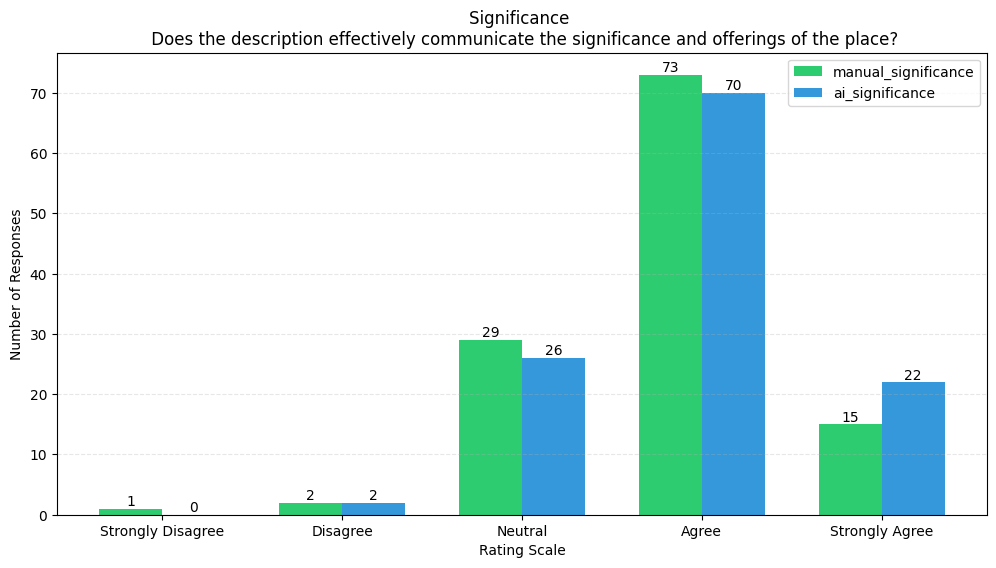

In [37]:
# Does the description effectively communicate the significance and offerings of the place?
cat_type = pd.CategoricalDtype(
        categories=['Strongly Disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly Agree'],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_significance','ai_significance', 'Significance \n Does the description effectively communicate the significance and offerings of the place?')

Manual counts: manual_trust
Not at all      3
Slightly       28
Moderately    107
Very          155
Extremely      27
Name: count, dtype: int64, AI counts: ai_trust
Not at all      1
Slightly       23
Moderately     87
Very          169
Extremely      40
Name: count, dtype: int64


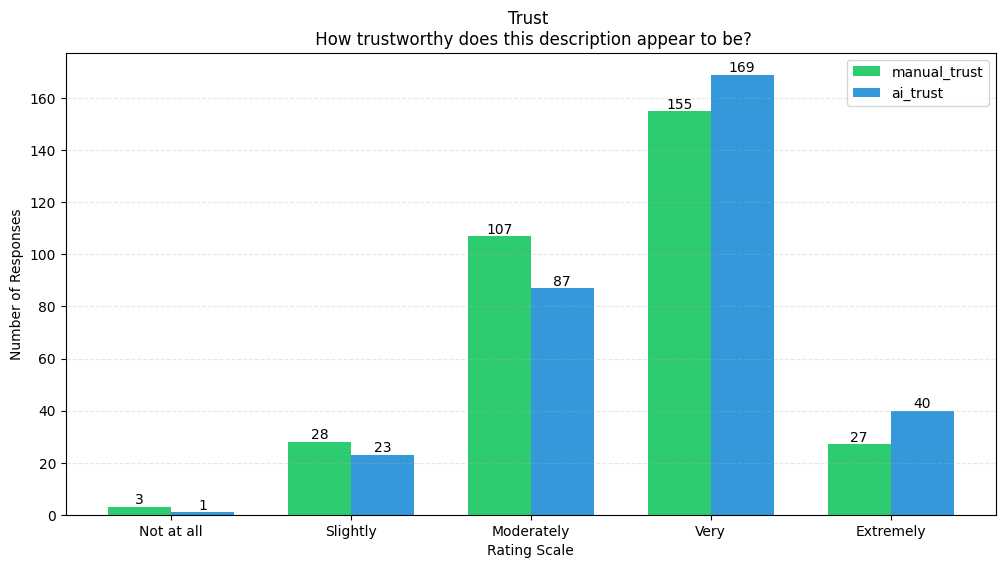

In [6]:
# How trustworthy does this description appear to be?
cat_type = pd.CategoricalDtype(
        categories=["Not at all", "Slightly", "Moderately", "Very", "Extremely"],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_trust','ai_trust', 'Trust \n How trustworthy does this description appear to be?')

C:\Users\saini\AppData\Local\Temp\ipykernel_25872\2344981966.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name1] = df[column_name1].astype(cat_type)
C:\Users\saini\AppData\Local\Temp\ipykernel_25872\2344981966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name2] = df[column_name2].astype(cat_type)


Manual counts: manual_clarity
Very Unclear     0
Unclear         12
Neutral         62
Clear           91
Very Clear      15
Name: count, dtype: int64, AI counts: ai_clarity
Very Unclear      3
Unclear           6
Neutral          39
Clear           111
Very Clear       21
Name: count, dtype: int64


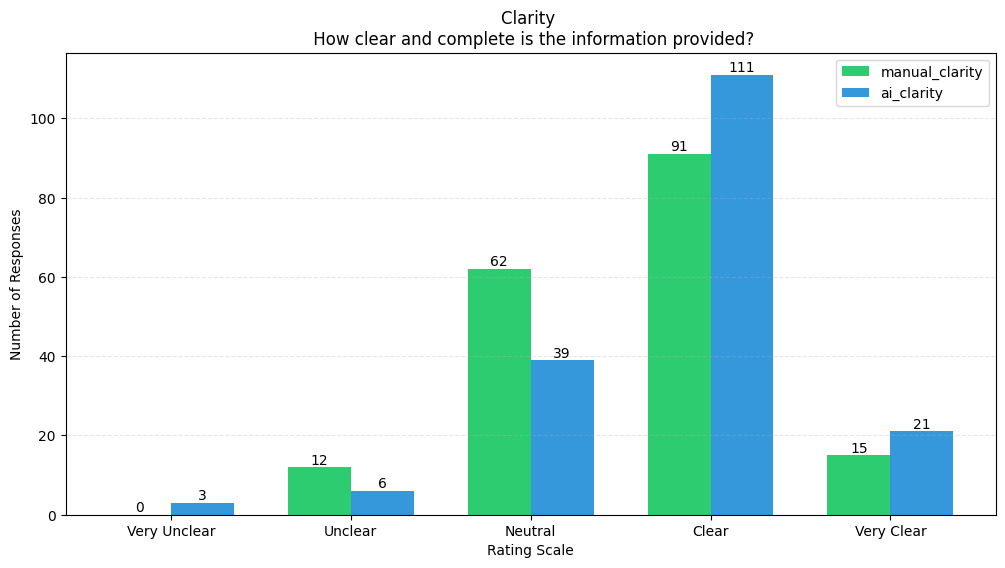

In [28]:
cat_type = pd.CategoricalDtype(
        categories=["Very Unclear", "Unclear", "Neutral", "Clear", "Very Clear"],
        ordered=True
    )
plot_graph(survey_df,cat_type, 'manual_clarity','ai_clarity', 'Clarity \n How clear and complete is the information provided?')

In [7]:
survey_df[survey_df['marital_status']== 'Divorced']

,user_id,age,gender,marital_status,has_children,nationality,city,disability,pets,profession,...,ai_significance,ai_trust,ai_clarity,engaging_preference,relevant_preference,eager_preference,title_preference,description_preference,already_visited,timestamp
200,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Agree,Very,Neutral,Version B,Version A,Version B,Version B,Both equally,I have never heard of it before.,2025-01-28T13:31:10.819925
201,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Agree,Moderately,Neutral,Version B,Version B,Version B,Both equally,Both equally,I have never heard of it before.,2025-01-28T13:32:53.310923
202,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have never heard of it before.,2025-01-28T13:33:49.617171
203,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Agree,Very,Clear,Version A,Version A,Version A,Version A,Version A,I have seen/heard about it online or from others.,2025-01-28T13:34:39.823131
204,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Neutral,Moderately,Neutral,Version A,Version A,Version A,Version A,Version A,I have visited it in person.,2025-01-28T13:37:34.182680
205,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Neutral,Very,Very Clear,Both equally,Both equally,Both equally,Both equally,Both equally,I have visited it in person.,2025-01-28T13:38:21.047892
206,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Strongly Agree,Extremely,Very Clear,Version B,Version B,Version B,Version B,Version B,I have visited it in person.,2025-01-28T13:39:03.896008
207,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Strongly Agree,Extremely,Very Clear,Version B,Version B,Version B,Version B,Both equally,I have visited it in person.,2025-01-28T13:40:41.170287
208,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Strongly Agree,Extremely,Very Clear,Version A,Version A,Version A,Version A,Both equally,I have visited it in person.,2025-01-28T13:41:19.245933
209,9f51ab1b-40cd-4938-94e8-030f0d704888,39,Male,Divorced,No,Indian,Stuttgart,No,No,Academic/Professor,...,Agree,Very,Clear,Version B,Version B,Version B,Version B,Version B,I have seen/heard about it online or from others.,2025-01-28T13:42:38.480882


engaging_preference: engaging_preference
No Selection      0.0
Manual          135.0
AI Generated    129.0
Both equally     56.0
Name: count, dtype: float64
relevant_preference: relevant_preference
No Selection      0.0
Manual          157.0
AI Generated    106.0
Both equally     57.0
Name: count, dtype: float64
eager_preference: eager_preference
No Selection      0.0
Manual          140.0
AI Generated    123.0
Both equally     57.0
Name: count, dtype: float64
title_preference: title_preference
No Selection      0.0
Manual          151.0
AI Generated    107.0
Both equally     62.0
Name: count, dtype: float64
description_preference: description_preference
No Selection      0.0
Manual          147.0
AI Generated    107.0
Both equally     66.0
Name: count, dtype: float64


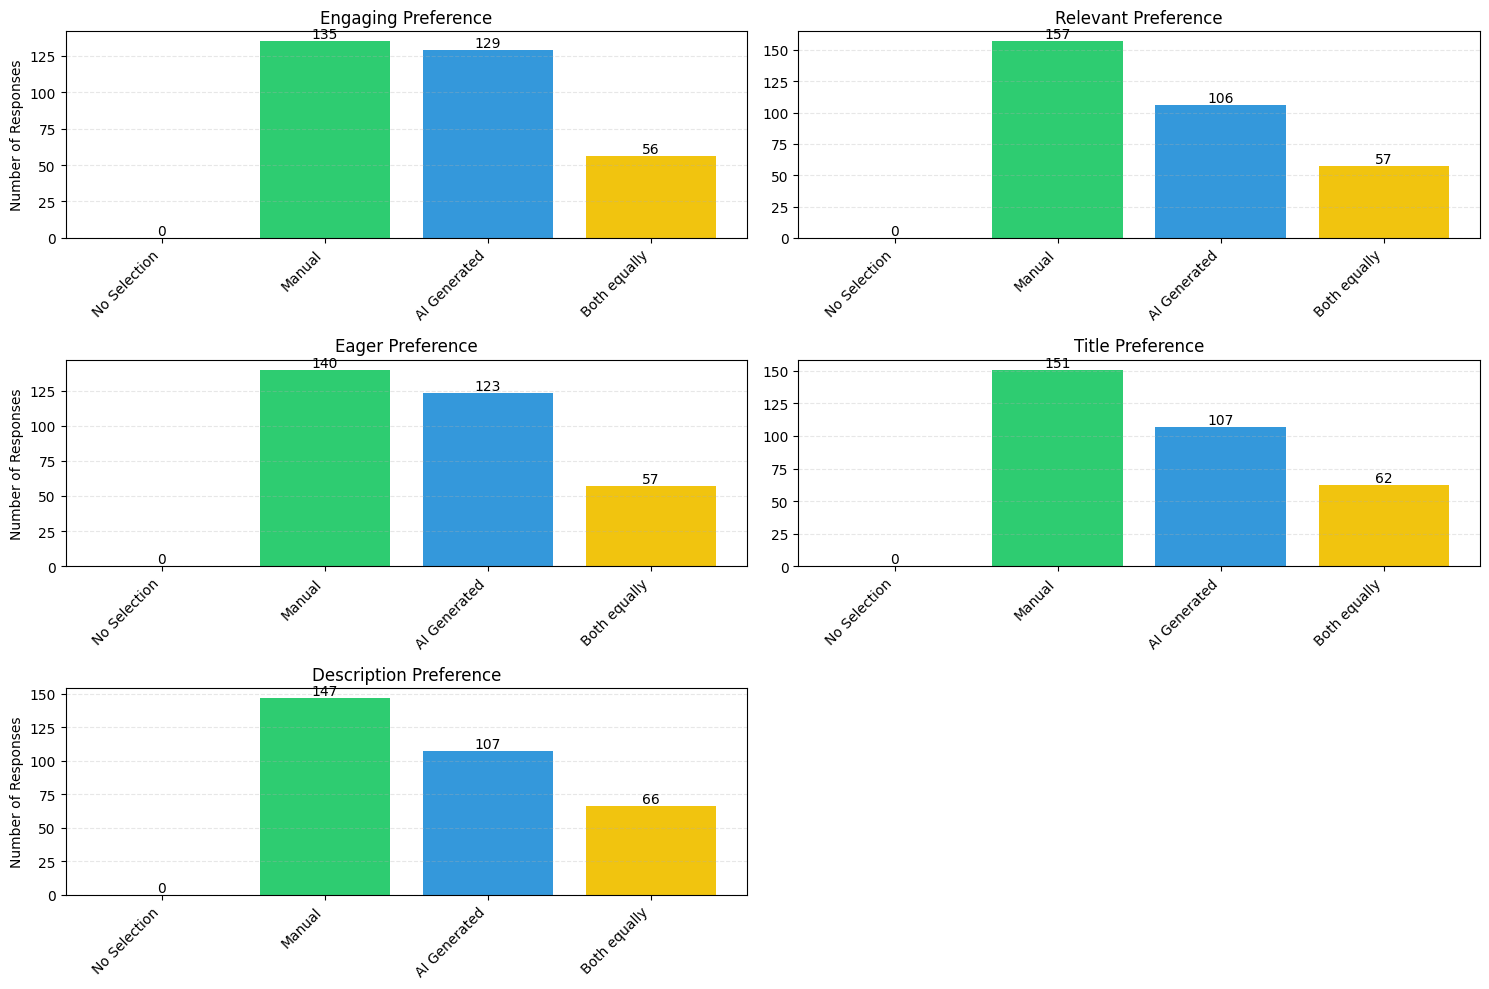

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data


# List of preference columns
preference_columns = [
    'engaging_preference', 
    'relevant_preference', 
    'eager_preference',
    'title_preference', 
    'description_preference'
]

# Function to replace versions based on is_manual_first
def replace_versions(row, column):
    value = row[column]
    if value in ['Version A', 'Version B']:
        if row['is_manual_first']:
            return 'Manual' if value == 'Version A' else 'AI Generated'
        else:
            return 'AI Generated' if value == 'Version A' else 'Manual'
    return value

# Apply the replacement for each preference column
for col in preference_columns:
    survey_df[col] = survey_df.apply(lambda row: replace_versions(row, col), axis=1)

# Create subplots for each preference
plt.figure(figsize=(15, 10))

# Define colors for each category
colors = {
    'No Selection': '#95a5a6',
    'Manual': '#2ecc71',
    'AI Generated': '#3498db',
    'Both equally': '#f1c40f'
}

# Define the order of categories
categories = ['No Selection', 'Manual', 'AI Generated', 'Both equally']

for i, column in enumerate(preference_columns, 1):
    plt.subplot(3, 2, i)
    
    # Count values and reindex to ensure all categories are present
    
    value_counts = survey_df[column].value_counts().reindex(categories).fillna(0)
    print(f"{column}: {value_counts}")
    
    # Create bar plot
    bars = plt.bar(value_counts.index, value_counts.values, 
                  color=[colors[cat] for cat in value_counts.index])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # Customize each subplot
    plt.title(column.replace('_', ' ').title())
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    
    # Add y-label only for leftmost plots
    if i % 2 == 1:
        plt.ylabel('Number of Responses')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
survey_df['engaging_preference'].value_counts()

engaging_preference
Manual          135
AI Generated    129
Both equally     56
Name: count, dtype: int64

# loading final

In [24]:
final_response= pd.read_csv("./processed_data/processed_final_responses.csv")

In [28]:
final_response

,timestamp,overall_rating,comments,adaptation_rating,ai_comfort_rating,final_feedback,lottery_email,response_date,response_time
0,2025-01-26 04:50:32.387757,4.0,NaN,4.0,4.0,NaN,vikasalha@gmail.com,2025-01-26,04:50:32.387757
1,2025-01-27 18:27:01.006977,4.0,NaN,4.0,5.0,NaN,skycool2408@gmail.com,2025-01-27,18:27:01.006977
2,2025-01-25 12:32:34.044795,3.0,NaN,3.0,2.0,NaN,NaN,2025-01-25,12:32:34.044795
3,2024-12-18 08:54:40.324446,4.0,NaN,3.0,3.0,NaN,deepsynergy@gmail.com,2024-12-18,08:54:40.324446
4,2025-01-25 10:54:45.854198,NaN,NaN,NaN,NaN,NaN,unniashish13@gmail.com,2025-01-25,10:54:45.854198
5,2025-01-26 17:13:34.054604,4.0,NaN,5.0,5.0,NaN,NaN,2025-01-26,17:13:34.054604
6,2025-01-27 17:22:51.556760,4.0,NaN,4.0,4.0,NaN,gopalnayak.13@gmail.com,2025-01-27,17:22:51.556760
7,2025-01-25 17:10:49.560429,4.0,NaN,4.0,4.0,Satisfied,n.nitinsinha@gmail.com,2025-01-25,17:10:49.560429
8,2025-01-26 05:38:38.423458,NaN,NaN,NaN,NaN,It was a great experience to think through and...,swapnilsharma1@hotmail.com,2025-01-26,05:38:38.423458
9,2025-01-25 12:36:49.080825,4.0,NaN,5.0,4.0,AI generate descriptions are very engaging and...,ameer_khan.ali@outlook.com,2025-01-25,12:36:49.080825


In [35]:
#How would you rate your overall experience with the POI descriptions provided in this study?
print(f'How would you rate your overall experience with the POI descriptions provided in this study? \n \t {final_response['overall_rating'].mean(skipna=True)}')


How would you rate your overall experience with the POI descriptions provided in this study? 
 	 3.8823529411764706


In [36]:
#What is your opinion on the idea of automatically adapting POI descriptions based on user interests?
print(f'What is your opinion on the idea of automatically adapting POI descriptions based on user interests? \n \t {final_response['adaptation_rating'].mean(skipna=True)}')


What is your opinion on the idea of automatically adapting POI descriptions based on user interests? 
 	 3.75


In [37]:
#How comfortable are you with reading AI-generated descriptions when planning visits to new places?
print(f'How comfortable are you with reading AI-generated descriptions when planning visits to new places? \n \t {final_response['ai_comfort_rating'].mean(skipna=True)}')

How comfortable are you with reading AI-generated descriptions when planning visits to new places? 
 	 3.9411764705882355


In [ ]:
import scipy.stats as stats
import numpy as np

# trust
# Contingency Table
data = np.array([
    [72, 54],
    [261, 235],
    [140, 170],
    [33, 43],
    [4, 8]
])

chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square statistic: 9.49, p-value: 0.0500


In [ ]:
import scipy.stats as stats
import numpy as np

# significance
# Contingency Table
data = np.array([
    [84, 63],
    [276, 281],
    [118, 138],
    [24, 21],
    [8, 7]
])

chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")


Chi-square statistic: 4.87, p-value: 0.3005


In [5]:
import scipy.stats as stats
import numpy as np

# Clarity
# Contingency Table
data = np.array([
    [88, 67],
    [284, 260],
    [109, 147],
    [24, 33],
    [5, 3]
])

chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}")

Chi-square statistic: 11.47, p-value: 0.0218
